In [1]:
import matplotlib.pyplot as plt
from astropy.table import Table, Column, MaskedColumn, pprint
from astropy.io import fits
from astropy.wcs import WCS

def openfit(b):
    hdu_list = fits.open(b)
    hdu_list.info()
    image_data = hdu_list[0].data
    plt.imshow(image_data, cmap='gray')
    plt.colorbar()
    plt.show()

import os
import numpy as np

path='/Users/s2537809/MUSE'#specify code directory
os.chdir(path)


 
#openfit('cube_26_img.fits')


with fits.open('cube_26.fits') as hdul:
    hdul.info()
    data = hdul[0].data
    wcs = WCS(hdul[0].header)

print(wcs.world_axis_physical_types)


 #Assuming that the wavelength axis is the third axis (index 2) as indicated by 'em.wl'
wavelength_axis_index = 2

# Extracting the wavelength data
wavelength_start = wcs.pixel_to_world_values(*tuple(0 for _ in range(data.ndim)))[wavelength_axis_index]
wavelength_end = wcs.pixel_to_world_values(*tuple((s - 1) for s in data.shape))[wavelength_axis_index]

# Ensure wavelength_start and wavelength_end are numerical
wavelength_start = float(wavelength_start)
wavelength_end = float(wavelength_end)

# Calculate the step size
wavelength_resolution = np.abs(wavelength_end - wavelength_start) / (data.shape[wavelength_axis_index] - 1)

print("Wavelength resolution:", wavelength_resolution)



# Print the wavelength axis values
print("Wavelength Axis Values:")
for i in range(data.shape[wavelength_axis_index]):
    # Create pixel indices for the current wavelength
    pixel_indices = [0] * data.ndim
    pixel_indices[wavelength_axis_index] = i
    
    # Convert pixel indices to world coordinates (wavelength values)
    wavelength_value = wcs.pixel_to_world_values(*pixel_indices)[wavelength_axis_index]
    
    print(f"Wavelength {i+1}: {wavelength_value}")




# Initialize a flag to indicate uniform steps
uniform_steps = True

# Extracting the wavelength data
wavelength_values = wcs.pixel_to_world_values(*tuple(0 for _ in range(data.ndim)))[wavelength_axis_index]

# Iterate through all pairs of consecutive wavelengths
for i in range(1, data.shape[wavelength_axis_index]):
    # Get the wavelength value for the current index
    current_wavelength = wcs.pixel_to_world_values(*tuple([0] * wavelength_axis_index + [i] + [0] * (data.ndim - wavelength_axis_index - 1)))[wavelength_axis_index]
    
    # Calculate the difference between current and previous wavelength
    step_size = current_wavelength - wavelength_values
    
    # Update wavelength_values for the next iteration
    wavelength_values = current_wavelength
    
    # Check if the step size is consistent with previous steps
    if not np.isclose(step_size, wavelength_resolution):
        uniform_steps = False
        break

# Print the result
if uniform_steps:
    print("The steps between consecutive wavelengths are uniform.")
else:
    print("The steps between consecutive wavelengths are not uniform.")



Filename: cube_26.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (409, 411, 3722)   float32   
['pos.eq.ra', 'pos.eq.dec', 'em.wl']
Wavelength resolution: 1.2499999999999993e-10
Wavelength Axis Values:
Wavelength 1: 4.7003271484375004e-07
Wavelength 2: 4.7015771484375005e-07
Wavelength 3: 4.7028271484375006e-07
Wavelength 4: 4.7040771484375e-07
Wavelength 5: 4.7053271484375e-07
Wavelength 6: 4.7065771484375003e-07
Wavelength 7: 4.7078271484375004e-07
Wavelength 8: 4.7090771484375005e-07
Wavelength 9: 4.7103271484375006e-07
Wavelength 10: 4.7115771484375e-07
Wavelength 11: 4.7128271484375003e-07
Wavelength 12: 4.7140771484375004e-07
Wavelength 13: 4.7153271484375005e-07
Wavelength 14: 4.7165771484375005e-07
Wavelength 15: 4.7178271484375006e-07
Wavelength 16: 4.7190771484375e-07
Wavelength 17: 4.7203271484375003e-07
Wavelength 18: 4.7215771484375004e-07
Wavelength 19: 4.7228271484375005e-07
Wavelength 20: 4.7240771484375006e-

In [6]:

from mpdaf.obj import Cube, WCS, WaveCoord, Image

get_band_image(cube, 'WFC3_F606W')

NameError: name 'get_band_image' is not defined

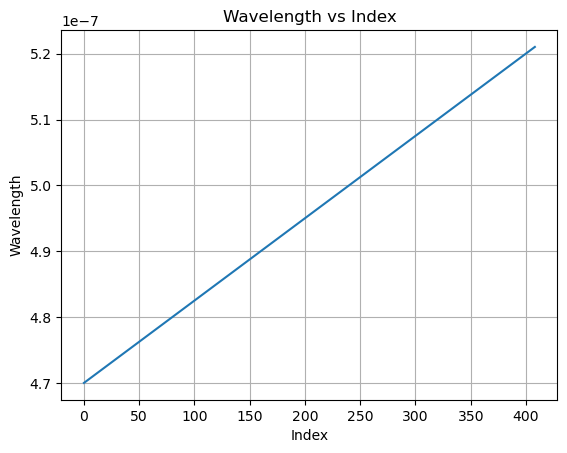

Largest step in wavelength: 1.2500000000006233e-10
Smallest step in wavelength: 1.2499999999995645e-10


In [4]:
import matplotlib.pyplot as plt

# Initialize arrays to store wavelength values and indices
wavelength_values = []
indices = []

# Extract the wavelength axis values
for i in range(data.shape[2]):
    # Create pixel indices for the current wavelength
    pixel_indices = [2] * data.ndim
    pixel_indices[2] = i
    
    # Convert pixel indices to world coordinates (wavelength values)
    wavelength_value = wcs.pixel_to_world_values(*pixel_indices)[2]
    
    # Append wavelength value and index
    wavelength_values.append(wavelength_value)
    indices.append(i)

# Plot wavelength against index
plt.plot(indices, wavelength_values)
plt.xlabel('Index')
plt.ylabel('Wavelength')
#plt.xlim(50,100)
#plt.ylim(150.1,150.12)
plt.title('Wavelength vs Index')
plt.grid(True)
plt.show()


# Initialize arrays to store wavelength differences
wavelength_diffs = []

# Extract the wavelength axis values
for i in range(1, data.shape[2]):
    # Create pixel indices for the current and previous wavelengths
    pixel_indices_current = [2] * data.ndim
    pixel_indices_current[2] = i
    
    pixel_indices_previous = [2] * data.ndim
    pixel_indices_previous[2] = i - 1
    
    # Convert pixel indices to world coordinates (wavelength values)
    wavelength_current = wcs.pixel_to_world_values(*pixel_indices_current)[2]
    wavelength_previous = wcs.pixel_to_world_values(*pixel_indices_previous)[2]
    
    # Calculate the difference between current and previous wavelengths
    wavelength_diff = wavelength_current - wavelength_previous
    
    # Append the difference to the list
    wavelength_diffs.append(wavelength_diff)

# Find the largest and smallest differences
largest_step = np.max(wavelength_diffs)
smallest_step = np.min(wavelength_diffs)

print("Largest step in wavelength:", largest_step)
print("Smallest step in wavelength:", smallest_step)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[150.11306558 150.11300998 150.11295438 ... 150.09049181 150.09043621
  150.09038061]
 [150.11306558 150.11300998 150.11295438 ... 150.09049181 150.09043621
  150.09038061]
 [150.11306558 150.11300998 150.11295438 ... 150.09049181 150.09043621
  150.09038061]
 ...
 [150.11306577 150.11301017 150.11295457 ... 150.09049164 150.09043604
  150.09038044]
 [150.11306577 150.11301017 150.11295457 ... 150.09049164 150.09043604
  150.09038044]
 [150.11306577 150.11301017 150.11295457 ... 150.09049164 150.09043604
  150.09038044]]
[[2.30169818 2.30169818 2.30169818 ... 2.30169819 2.30169819 2.30169819]
 [2.30175373 2.30175373 2.30175373 ... 2.30175374 2.30175374 2.30175374]
 [2.30180929 2.30180929 2.30180929 ... 2.3018093  2.3018093  2.3018093 ]
 ...
 [2.32436484 2.32436484 2.32436484 ... 2.32436485 2.32436485 2.32436485]
 [2.3244204  2.3244

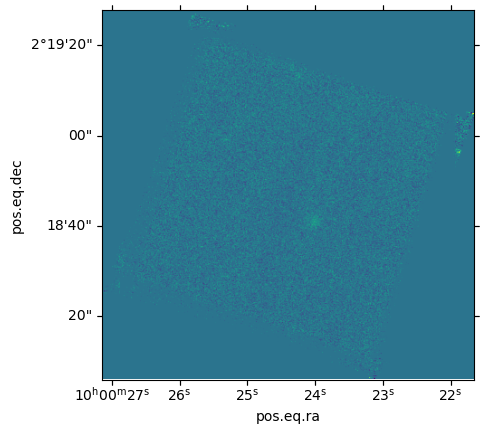

In [138]:


#hdul[0].header


# Select the slices
slices = list(range(50, 501))

# Calculate the average of the selected slices
average_slice = np.mean(data[slices], axis=0)

print(average_slice)

ax = plt.subplot(projection=wcs, slices=('x', 'y',0 )) # this works providing the RA and DEC are the same for eveery slice - which they are here and surely they always are for any given cube?
ax.coords[2].set_ticklabel(exclude_overlapping=True)
#ax.imshow(average_slice.transpose()) 
ax.imshow(data[100,:, :].transpose())#need to reverse the order of dimensions here to the slice


  
y, x = np.mgrid[:data.shape[1], :data.shape[2]]
ra, dec, lmin = wcs.all_pix2world(x, y, 50,0)
ra, dec, lmax = wcs.all_pix2world(x, y, 3722,0)
print(ra)
print(dec)
print('Lmin:', lmin) # this is the wavelength of the slice
print('Lmax:', lmax) # this is the wavelength of the slice


# The lambda range is 4700 to 9353 Angstroms


In [30]:
data.shape


# Select the slices
slices = list(range(50, 501))

# Calculate the average of the selected slices
average_slice = np.mean(data[slices], axis=0)

In [8]:
import numpy as np

with open('HST_WFC3_UVIS2.F606W.dat', 'r') as file:
    HST = file.read()


# Split the data into lines
HST = HST.split('\n')

# Split each line into columns and filter out any lines that don't have 2 columns
rows = [row.split() for row in HST if len(row.split()) == 2]

HST_table = Table(rows=rows, names=['Wavelength', 'Throughput'])

print(HST_table)


# Extract the wavelength values from the table and convert to float
wavelengths = np.array(HST_table['Wavelength'], dtype=float)

#Calculate the differences between consecutive wavelengths
wavelength_diffs = np.diff(wavelengths)

#Calculate the average, smallest, and largest step size
average_step = np.mean(wavelength_diffs)
smallest_step = np.min(wavelength_diffs)
largest_step = np.max(wavelength_diffs)

# Print the results 606 814 rms
print("Average step size between wavelengths:", average_step)
print("Smallest step size between wavelengths:", smallest_step)
print("Largest step size between wavelengths:", largest_step) 

 Wavelength  Throughput
----------- -----------
4579.000000 6.16977e-05
4580.000000 6.48326e-05
4581.000000  6.7968e-05
4581.283691 6.88576e-05
4582.000000 7.19065e-05
4583.000000 7.61635e-05
4584.000000 8.04211e-05
4585.000000 8.46792e-05
4586.000000 8.89456e-05
4587.000000 9.32053e-05
        ...         ...
7363.000000 6.90451e-05
7364.000000 6.80117e-05
7365.000000 6.69732e-05
7366.000000 6.59413e-05
7367.000000 6.49101e-05
7368.000000  6.3874e-05
7369.000000 6.28443e-05
7370.000000 6.18098e-05
7371.000000 6.07816e-05
7372.000000 5.97488e-05
7372.030273 5.97177e-05
Length = 3074 rows
Average step size between wavelengths: 0.90889367816466
Smallest step size between wavelengths: 0.00048799999967741314
Largest step size between wavelengths: 1.0


Filename: /Users/s2537809/MUSE/cube_27_img.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      70   (407, 407)   float32   


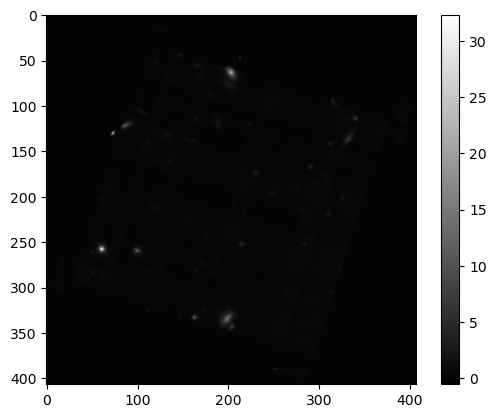

Filename: cube_27.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (407, 407, 3722)   float32   


In [32]:
openfit('/Users/s2537809/MUSE/cube_27_img.fits')
with fits.open('cube_27.fits') as hdul:
    hdul.info()
    data = hdul[0].data

Filename: /Users/s2537809/MUSE/cube_28_img.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      70   (409, 406)   float32   


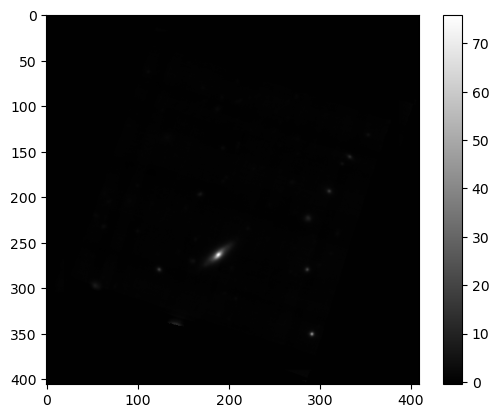

Filename: cube_28.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (409, 406, 3722)   float32   


In [3]:
openfit('/Users/s2537809/MUSE/cube_28_img.fits')
with fits.open('cube_28.fits') as hdul:
    hdul.info()
    data = hdul[0].data




In [139]:
import matplotlib.pyplot as plt
from astropy.table import Table, Column, MaskedColumn, pprint
from astropy.io import fits
from astropy.wcs import WCS

# Assuming you have already opened the FITS file and obtained the WCS object
# Assuming you have also accessed the data array from the FITS file



import os
import numpy as np

path='/Users/s2537809/MUSE'#specify code directory
os.chdir(path)



filename = 'cube_26.fits'
hdulist = fits.open(filename)  
hdu = hdulist[0]  
wcs = WCS(hdu.header)  
data_cube = hdu.data
print(wcs  )

print(wcs.pixel_n_dim )
print(wcs.world_n_dim  )
print(wcs.array_shape  )
print(hdu.data.shape  )
print(wcs.pixel_shape  ) # keeps the same order as the NAXIS keywords in the header
print(wcs.world_axis_physical_types  )

celestial, spectral = wcs.pixel_to_world(list(range(1,5)), list(range(1,5)), list(range(1,5)))  # prints these specific pixel coordinates in si units (can use lists instead of single values)
print(celestial  )
print(spectral  )


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'AWAV'  
CRVAL : 150.101125  2.31237  4.7003271484375004e-07  
CRPIX : 215.757034655676  193.091925765594  1.0  
CD1_1 CD1_2 CD1_3  : -5.55555555555556e-05  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  5.55555555555556e-05  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  1.25e-10  
NAXIS : 409  411  3722
3
3
(3722, 411, 409)
(3722, 411, 409)
(409, 411, 3722)
['pos.eq.ra', 'pos.eq.dec', 'em.wl']
<SkyCoord (ICRS): (ra, dec) in deg
    [(150.11300998, 2.30175373), (150.11295438, 2.30180929),
     (150.11289878, 2.30186484), (150.11284318, 2.3019204 )]>
[4.70157715e-07 4.70282715e-07 4.70407715e-07 4.70532715e-07] m


In [128]:
from astropy import units as u

spectral * 10**10 *u.AA/u.m  # convert to Angstroms




<Quantity [4701.57714844, 4702.82714844, 4704.07714844, 4705.32714844] Angstrom>

In [131]:
import numpy as np
from scipy.interpolate import interp1d

# Assuming you have loaded the MUSE wavelength data into 'spectral' variable

# Extracting wavelengths from the HST data
hst_wavelengths = HST_table['Wavelength']

# Interpolating the MUSE data onto the HST wavelengths
muse_wavelengths_interpolated = interp1d(np.arange(len(spectral)), spectral, kind='linear')(np.linspace(0, len(spectral) - 1, len(hst_wavelengths)))
#check the interpolation#
# Now muse_wavelengths_interpolated contains the interpolated MUSE wavelengths that match the wavelength grid of HST data


In [133]:
len(muse_wavelengths_interpolated)

3074

In [140]:
# Let's say you want to access the flux value at pixel coordinates (x, y) and spectral channel z
x = 10  # Example pixel coordinate in RA direction
y = 20  # Example pixel coordinate in DEC direction
z = 5   # Example spectral channel

# Accessing flux value at the specified coordinates
flux_value = data_cube[x, y, z] #these pixels maybe should be inverted
print("Flux value at pixel coordinates ({}, {}) and spectral channel {}: {}".format(x, y, z, flux_value))


Flux value at pixel coordinates (10, 20) and spectral channel 5: 0.0


In [146]:


# Let's say you want to extract flux values for a specific spectral channel
spectral_channel = 10# Example spectral channel

# Slice the data cube along the spectral dimension to obtain the 2D array of flux values
flux_values_2d = data_cube[spectral_channel,:, :]

# Now you have a 2D array of flux values for the specified spectral channel
# You can access individual flux values using indices in the 2D array
# For example, flux_values_2d[i, j] will give you the flux value at pixel coordinates (i, j) for the specified spectral channel

# You can also print or further process this 2D array as needed
print("2D array of flux values for spectral channel {}: \n{}".format(spectral_channel, flux_values_2d))

print(flux_values_2d.shape)

print(max(flux_values_2d.flatten()))

2D array of flux values for spectral channel 10: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(411, 409)
40.896942


In [151]:
spectral

# Let's say you want to convert spectral channel values to wavelengths
spectral_channel_values = [0, 1, 2, 3]  # Example spectral channel values

# Convert spectral channel values to wavelengths using the WCS
_, _, wavelengths= wcs.all_pix2world(np.zeros(len(spectral_channel_values)), 
                                      np.zeros(len(spectral_channel_values)),
                                      spectral_channel_values, 0)  # 0 represents the origin 0-based indexing

# Now 'wavelengths' will contain the wavelengths corresponding to each spectral channel
print("Wavelengths corresponding to spectral channel values:")
print(wavelengths)


Wavelengths corresponding to spectral channel values:
[4.70032715e-07 4.70157715e-07 4.70282715e-07 4.70407715e-07]


In [ ]:
from mpdaf.obj import Cube
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from astropy import units as u
from numpy import ma
import numpy as np
from astropy.table import Table, Column, MaskedColumn, pprint
from astropy.io import fits
from astropy.wcs import WCS
from mpdaf.obj import Image
from scipy import integrate



def image_slice(cube,filter_k,filter_throughput, unit_wave=u.angstrom):
    # check inputs are 1d arrays 

    wavelengths = np.asarray(filter_k, dtype=float)
    sensitivities = np.asarray(filter_throughput, dtype=float)

    if (wavelengths.ndim != 1 or sensitivities.ndim != 1 or
            len(wavelengths) != len(sensitivities)):
        raise ValueError('The filter_k and filter_throughput arguments'
                        ' should be 1D arrays of equal length')
    
    
   
    #Give a choice to pass wavelength units as pixels not AA 
    
    pixels = cube.wave.pixel(wavelengths, unit=unit_wave) # Obtains the spectral pixel indexes of wavelengths
    
    # Get the integer indexes of the pixels that contain the above
    # floating point pixel indexes.
    indexes = np.rint(pixels).astype(int)
    
    # limit range of cube/ filter to be the same



    # interpolate across the filter curve 



    # integrate to determine the weights at different k 
            # ignore the masking section for now 



    # Get weighted average image along spectral axis 






## write from the mpdaf orrr write from this function
## check at least how the usm function works 
